In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

Mounted at /content/drive


In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df['good_quality'] = (df['quality'] >= 7).astype(int)

# Drop the original 'quality' column
df = df.drop(columns=['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
df.isnull().sum()
df = df.fillna(df.mean())

In [6]:
from sklearn.preprocessing import MinMaxScaler


columns_to_scale = df.columns[:-1]  # Exclude the last column from scaling

scaler = MinMaxScaler()
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled.loc[:, columns_to_scale] = scaler.fit_transform(df.loc[:, columns_to_scale])


In [7]:
from scipy import stats
import seaborn as sns

# z_scores = stats.zscore(df)
# df = df[(z_scores < 3).all(axis=1)]
# df.shape


In [8]:
z_scores = stats.zscore(df)
threshold = 3


outlier_mask = (z_scores > threshold) | (z_scores < -threshold)
median_values = np.median(df, axis=0)  # Calculate median values for each column
df[outlier_mask] = np.where(outlier_mask, median_values, df)


df.shape

(1599, 12)

In [9]:
for i in range(0,10):
    percentile25=df_scaled[df_scaled.columns[i]].quantile(0.25)
    percentile75=df_scaled[df_scaled.columns[i]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr

    filtered_subset = df_scaled.loc[df_scaled[df_scaled.columns[i]] < lower_limit].copy()
    filtered_subset.loc[:, df_scaled.columns[i]] = lower_limit
    df_scaled.loc[filtered_subset.index] = filtered_subset

    filtered_subset = df_scaled.loc[df_scaled[df_scaled.columns[i]] > upper_limit].copy()
    filtered_subset.loc[:, df_scaled.columns[i]] = upper_limit
    df_scaled.loc[filtered_subset.index] = filtered_subset

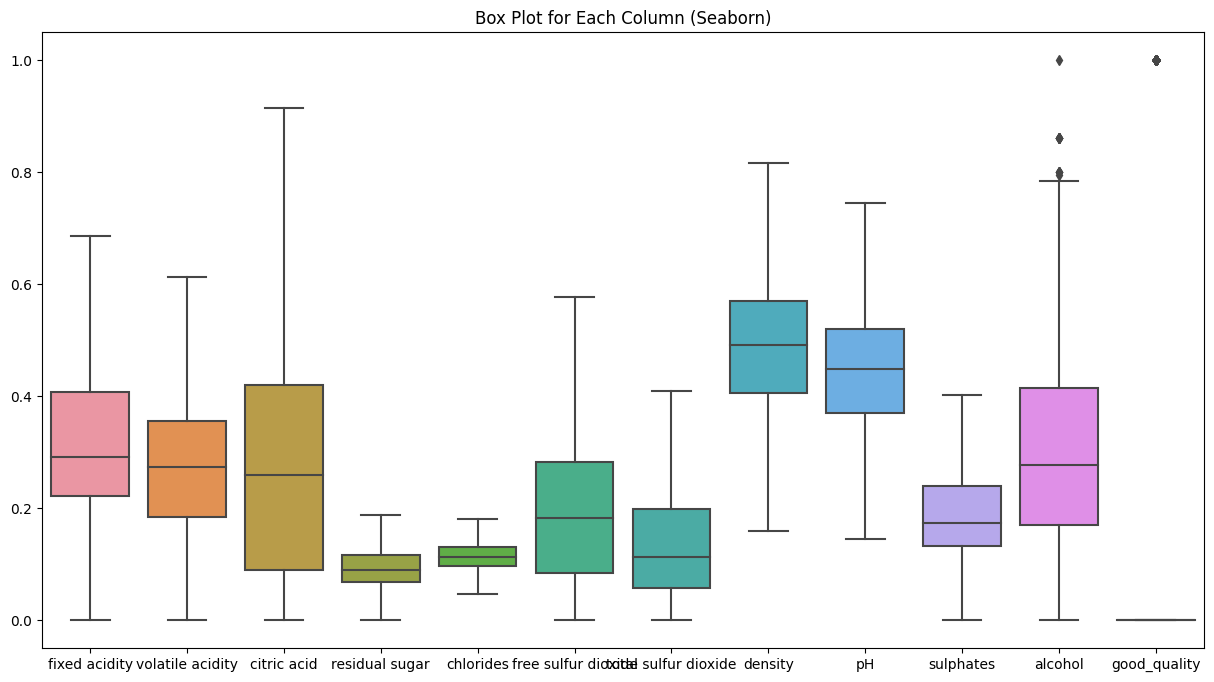

In [10]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_scaled)

plt.xticks(fontsize=10)
plt.title('Box Plot for Each Column (Seaborn)')
plt.show()

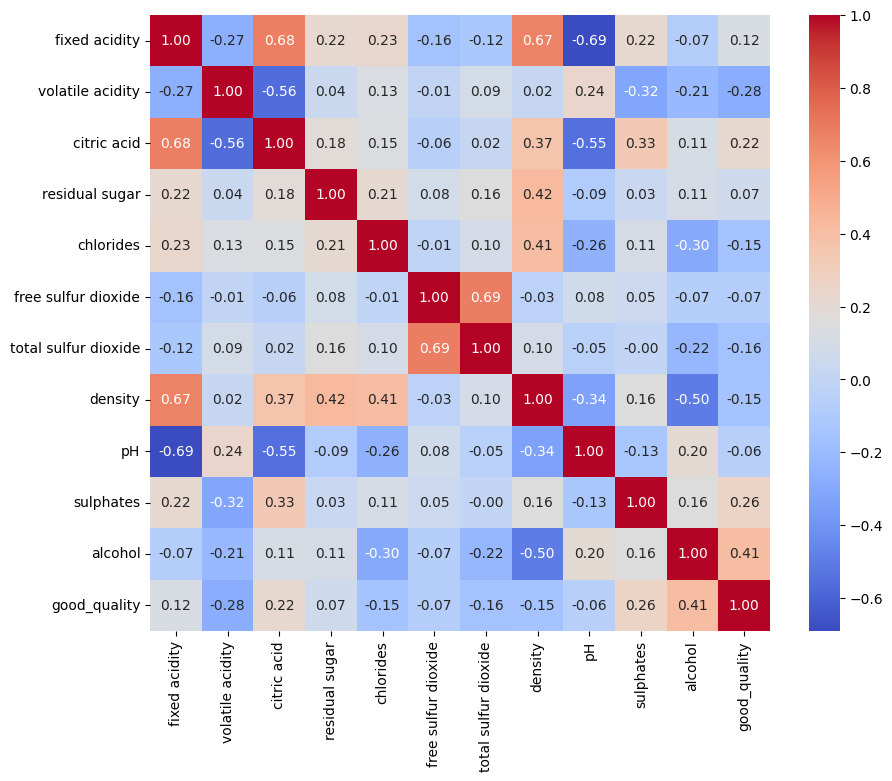

In [11]:
matrix=df_scaled[df_scaled.columns].corr()

matrix.good_quality[abs(matrix['good_quality'])>0.05].index
plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
X = df.drop(columns=['good_quality'])
y = df['good_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)


Logistic Regression Accuracy: 0.878125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K nearest neighbour

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

k_value = 4
# coming maximum at 4
# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (k =", k_value, ") Accuracy:", accuracy_knn)


K-Nearest Neighbors (k = 4 ) Accuracy: 0.8625


Decision Trees classifier


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Trees Accuracy:", accuracy_tree)


Decision Trees Accuracy: 0.853125


Random forest classifier


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)


Random Forest Accuracy: 0.896875


Logistic regression from scratch

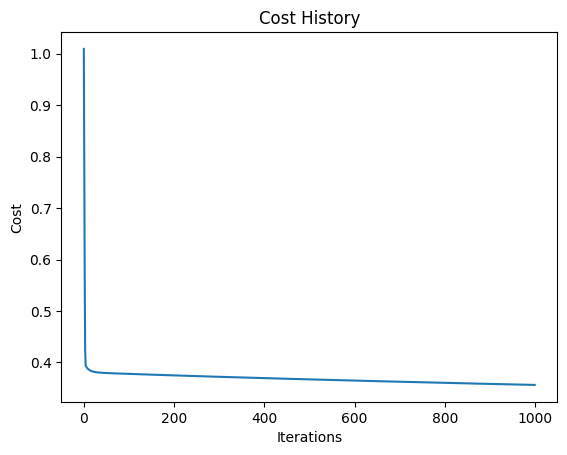

Accuracy: 0.853125


In [17]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    """Compute the logistic regression cost function."""
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    """Gradient descent to update parameters."""
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

def predict(X, theta, threshold=0.5):
    """Predict binary classes (0 or 1)."""
    probabilities = sigmoid(X @ theta)
    return (probabilities >= threshold).astype(int)


X_train = np.column_stack((np.ones(len(X_train)), X_train))

# Initialize parameters (weights)
theta_initial = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta_final, cost_history = gradient_descent(X_train, y_train, theta_initial, learning_rate, iterations)

# Plot cost history to check convergence
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

# Make predictions on a new dataset (X_test)
# Add a column of ones for the intercept term in X_test
X_test = np.column_stack((np.ones(len(X_test)), X_test))

# Predict
predictions = predict(X_test, theta_final)

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Decision Trees Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Display results
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("F1 Score:", logreg_f1)
print()

print("K-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("F1 Score:", knn_f1)
print()

print("Decision Trees Classifier:")
print("Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print()

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.865625
F1 Score: 0.3384615384615385

K-Nearest Neighbors:
Accuracy: 0.85
F1 Score: 0.1111111111111111

Decision Trees Classifier:
Accuracy: 0.878125
F1 Score: 0.5979381443298969

Random Forest Classifier:
Accuracy: 0.896875
F1 Score: 0.5925925925925926
